In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.svm import SVC,SVR
from sklearn.metrics import *
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split


In [2]:
df=pd.read_csv(r"C:\Users\ADMIN\Downloads\Paris.csv\ParisHousing.csv")

In [3]:
df

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1726,89,0,1,5,73133,7,6,2009,0,1,9311,1698,218,0,4,176425.9
9996,44403,29,1,1,12,34606,9,4,1990,0,1,9061,1742,230,0,0,4448474.0
9997,83841,3,0,0,69,80933,10,10,2005,1,1,8304,7730,345,1,9,8390030.5
9998,59036,70,0,0,96,55856,1,3,2010,0,1,2590,6174,339,1,4,5905107.0


In [5]:
from datasist.structdata import detect_outliers

In [8]:
numerical_features = ['squareMeters', 'numberOfRooms', 'floors', 'cityPartRange', 'basement']

# Detect outliers in numerical features
outliers_indices = detect_outliers(df, features=numerical_features, n=0)
number_of_outliers = len(outliers_indices)

print(f'Number of outliers in the Data: {number_of_outliers}')

Number of outliers in the Data: 0


In [28]:
df['squareMeters'].max

<bound method NDFrame._add_numeric_operations.<locals>.max of 0       75523
1       80771
2       55712
3       32316
4       70429
        ...  
9995     1726
9996    44403
9997    83841
9998    59036
9999     1440
Name: squareMeters, Length: 10000, dtype: int64>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  int64  
 2   hasYard            10000 non-null  int64  
 3   hasPool            10000 non-null  int64  
 4   floors             10000 non-null  int64  
 5   cityCode           10000 non-null  int64  
 6   cityPartRange      10000 non-null  int64  
 7   numPrevOwners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isNewBuilt         10000 non-null  int64  
 10  hasStormProtector  10000 non-null  int64  
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasStorageRoom     10000 non-null  int64  
 15  hasGuestRoom       10000 non-null  int64  
 16  price              1000

In [5]:
df.describe()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,10000.00000,1.000000e+04
mean,49870.13120,50.358400,0.508700,0.496800,50.276300,50225.486100,5.510100,5.521700,2005.48850,0.499100,0.499900,5033.103900,5028.01060,553.12120,0.503000,4.99460,4.993448e+06
std,28774.37535,28.816696,0.499949,0.500015,28.889171,29006.675799,2.872024,2.856667,9.30809,0.500024,0.500025,2876.729545,2894.33221,262.05017,0.500016,3.17641,2.877424e+06
min,89.00000,1.000000,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,1990.00000,0.000000,0.000000,0.000000,1.00000,100.00000,0.000000,0.00000,1.031350e+04
25%,25098.50000,25.000000,0.000000,0.000000,25.000000,24693.750000,3.000000,3.000000,1997.00000,0.000000,0.000000,2559.750000,2512.00000,327.75000,0.000000,2.00000,2.516402e+06
50%,50105.50000,50.000000,1.000000,0.000000,50.000000,50693.000000,5.000000,5.000000,2005.50000,0.000000,0.000000,5092.500000,5045.00000,554.00000,1.000000,5.00000,5.016180e+06
75%,74609.75000,75.000000,1.000000,1.000000,76.000000,75683.250000,8.000000,8.000000,2014.00000,1.000000,1.000000,7511.250000,7540.50000,777.25000,1.000000,8.00000,7.469092e+06
max,99999.00000,100.000000,1.000000,1.000000,100.000000,99953.000000,10.000000,10.000000,2021.00000,1.000000,1.000000,10000.000000,10000.00000,1000.00000,1.000000,10.00000,1.000677e+07


## pre-processing 

In [9]:
#missing values
df.isna().sum()

squareMeters         0
numberOfRooms        0
hasYard              0
hasPool              0
floors               0
cityCode             0
cityPartRange        0
numPrevOwners        0
made                 0
isNewBuilt           0
hasStormProtector    0
basement             0
attic                0
garage               0
hasStorageRoom       0
hasGuestRoom         0
price                0
dtype: int64

In [ ]:
numerical_features = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

# Detect outliers in numerical features
outliers_indices = detect_outliers(df, features=numerical_features, n=0)
number_of_outliers = len(outliers_indices)

print(f'Number of outliers in the Data: {number_of_outliers}')

In [6]:
df.columns

Index(['squareMeters', 'numberOfRooms', 'hasYard', 'hasPool', 'floors',
       'cityCode', 'cityPartRange', 'numPrevOwners', 'made', 'isNewBuilt',
       'hasStormProtector', 'basement', 'attic', 'garage', 'hasStorageRoom',
       'hasGuestRoom', 'price'],
      dtype='object')

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15104\847978521.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(value, ax=ax[index])
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15104\847978521.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(value, ax=ax[index])
C:\Users\ADMIN\AppData\Local\T

IndexError: index 14 is out of bounds for axis 0 with size 14

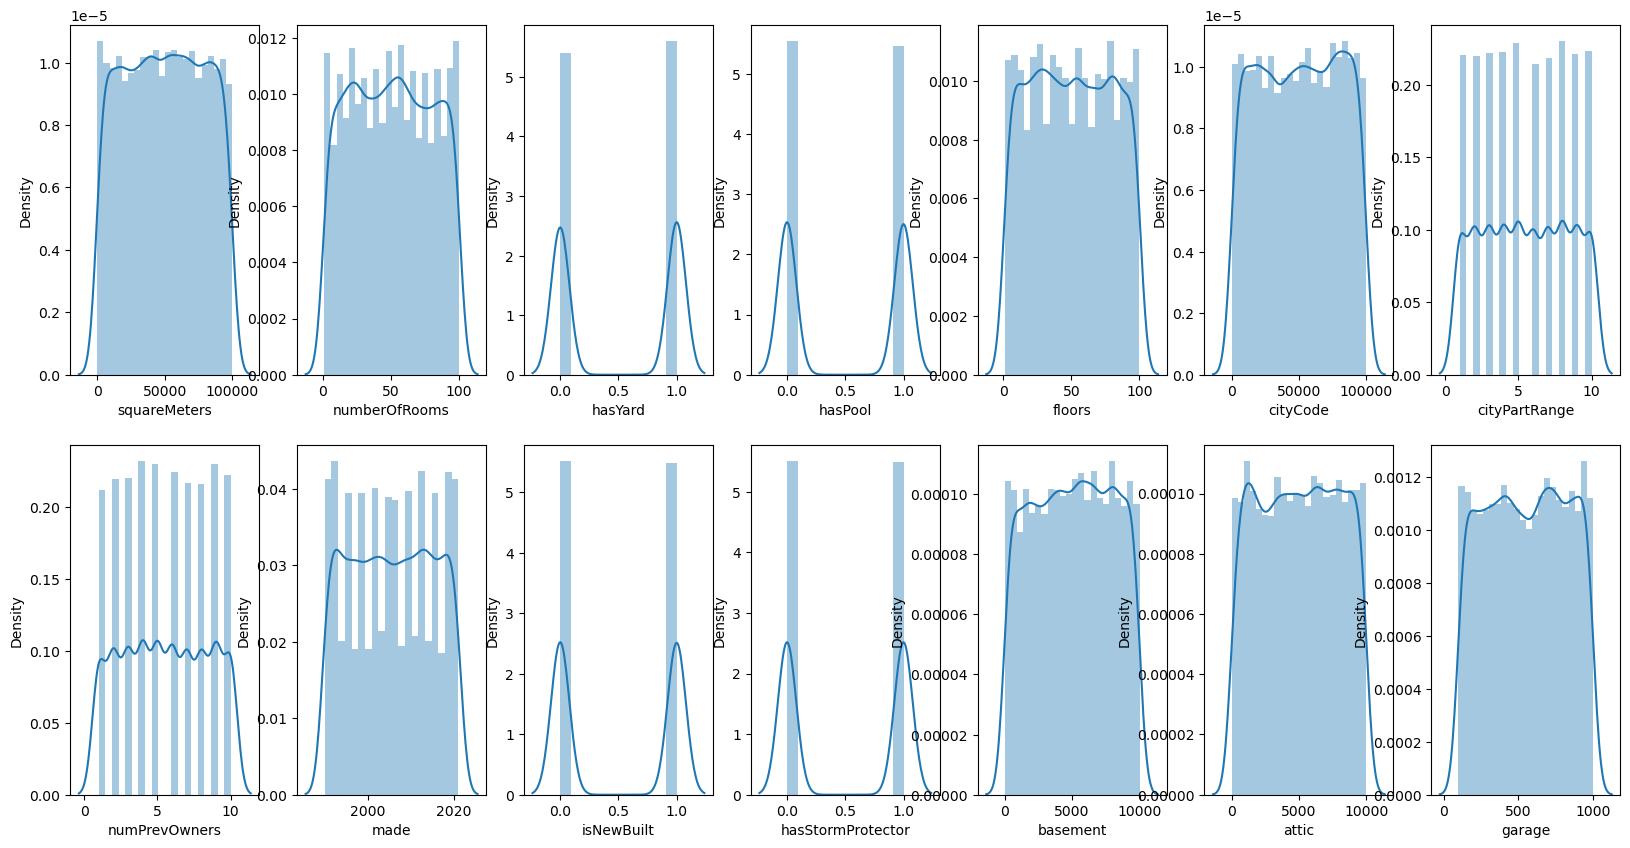

In [58]:
# create dist plot
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.distplot(value, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

<Axes: >

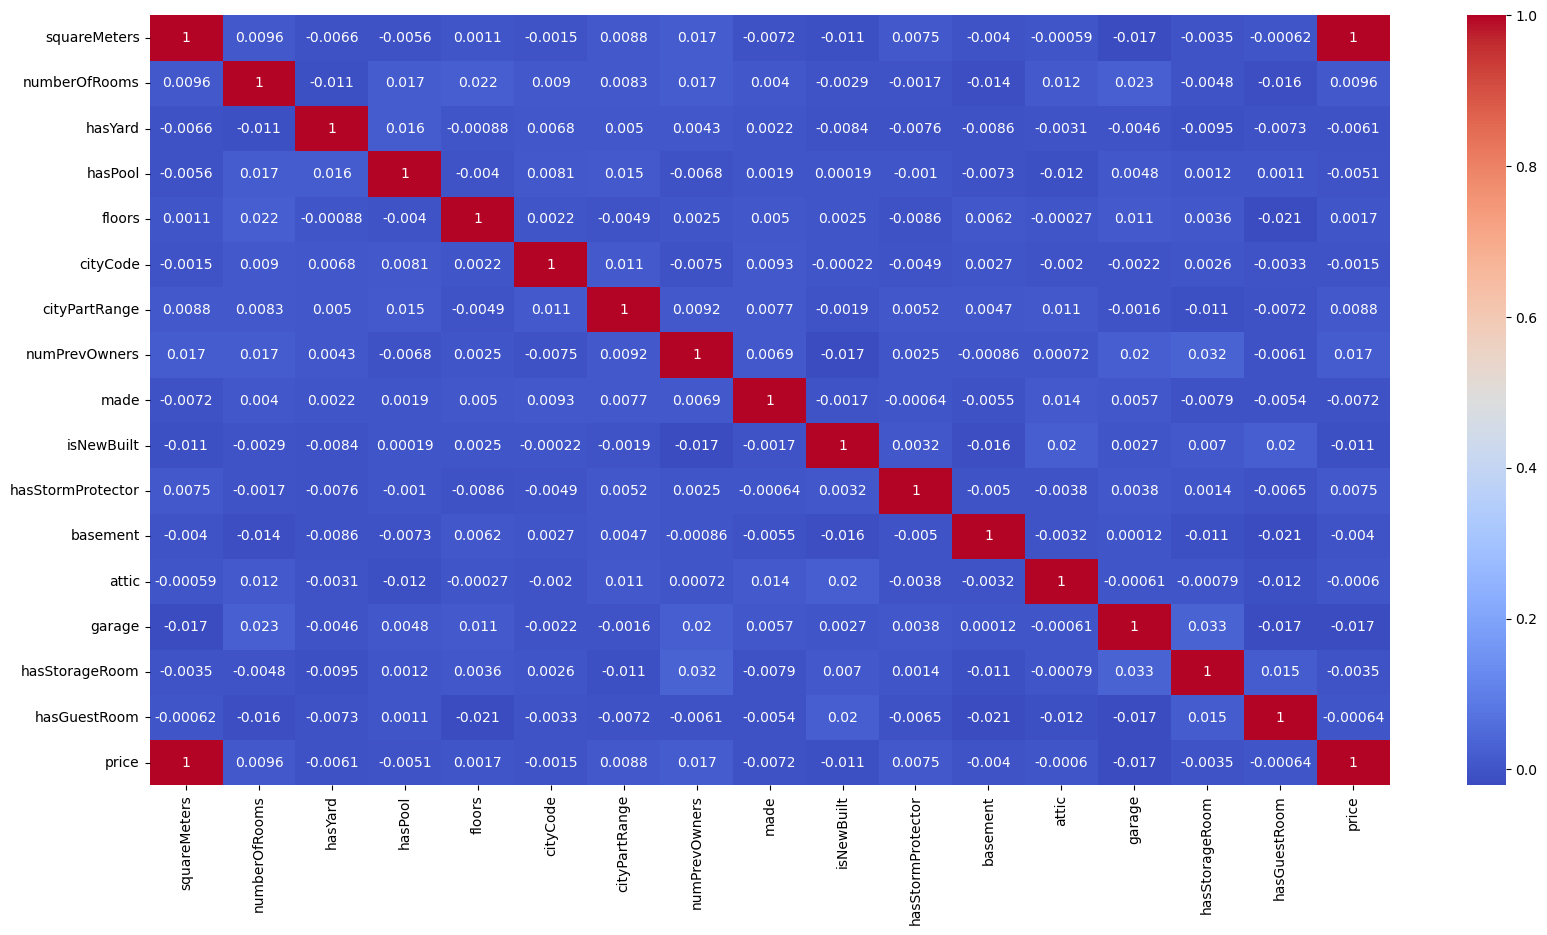

In [59]:
corr = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')

<Axes: xlabel='squareMeters', ylabel='price'>

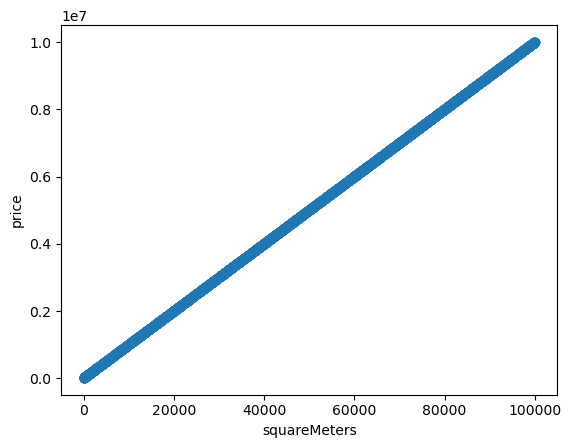

In [60]:
sns.regplot(y=df['price'], x=df['squareMeters'])

IndexError: index 14 is out of bounds for axis 0 with size 14

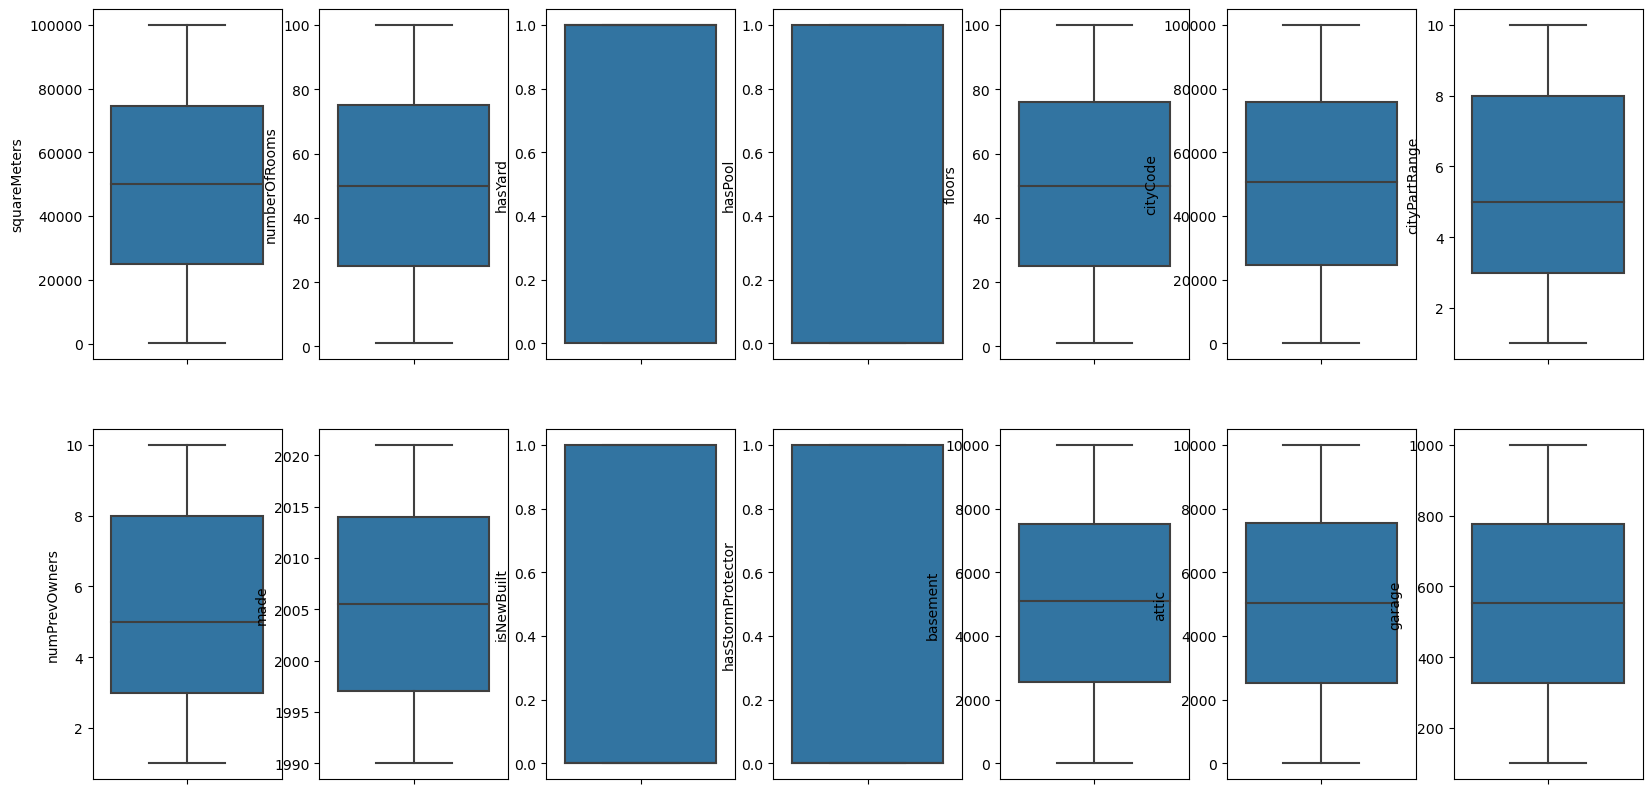

In [61]:
# create box plots
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.boxplot(y=col, data=df, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

In [14]:
fv=df.drop('price',axis=1)


In [15]:
fv.shape

(10000, 16)

In [18]:
x_train,x_test,y_train,y_test=train_test_split(fv,cv,test_size=0.2,random_state=143)

In [19]:
scaler=StandardScaler()

In [20]:
scaler

StandardScaler()

In [21]:
x_train=scaler.fit_transform(x_train)

In [22]:
x_test=scaler.transform(x_test)

In [7]:
fv=df.drop('price',axis=1)


In [8]:
fv

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1726,89,0,1,5,73133,7,6,2009,0,1,9311,1698,218,0,4
9996,44403,29,1,1,12,34606,9,4,1990,0,1,9061,1742,230,0,0
9997,83841,3,0,0,69,80933,10,10,2005,1,1,8304,7730,345,1,9
9998,59036,70,0,0,96,55856,1,3,2010,0,1,2590,6174,339,1,4


In [17]:
cv=df.iloc[:,-1]

In [10]:
cv

0       7559081.5
1       8085989.5
2       5574642.1
3       3232561.2
4       7055052.0
          ...    
9995     176425.9
9996    4448474.0
9997    8390030.5
9998    5905107.0
9999     146708.4
Name: price, Length: 10000, dtype: float64

In [11]:
x_train,x_test,y_train,y_test=train_test_split(fv,cv,test_size=0.2,random_state=143)

In [12]:
x_train.shape

(8000, 16)

In [13]:
y_train.shape

(8000,)

In [14]:
x_test.shape

(2000, 16)

In [15]:
y_test.shape

(2000,)

In [16]:
scaler=StandardScaler()

In [17]:
x_train=scaler.fit_transform(x_train)

In [18]:
x_test=scaler.transform(x_test)

In [19]:
df.columns

Index(['squareMeters', 'numberOfRooms', 'hasYard', 'hasPool', 'floors',
       'cityCode', 'cityPartRange', 'numPrevOwners', 'made', 'isNewBuilt',
       'hasStormProtector', 'basement', 'attic', 'garage', 'hasStorageRoom',
       'hasGuestRoom', 'price'],
      dtype='object')

# New Section

In [20]:
# Define pipelines
knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsRegressor())
])

svr_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svr', SVR())
])

linear_regression_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_regression', LinearRegression())
])

# Assuming X_train and y_train are your training features and labels
# Assuming X_test is your testing features

# Fit and predict with KNN Pipeline
knn_pipeline.fit(x_train, y_train)
knn_predictions = knn_pipeline.predict(x_test)

# Fit and predict with SVR Pipeline
svr_pipeline.fit(x_train, y_train)
svr_predictions = svr_pipeline.predict(x_test)

# Fit and predict with Linear Regression Pipeline
linear_regression_pipeline.fit(x_train, y_train)
linear_regression_predictions = linear_regression_pipeline.predict(x_test)

In [21]:
from sklearn.model_selection import GridSearchCV

# Define parameter grids for each pipeline
knn_param_grid = {
    'knn__n_neighbors': [3, 5, 7],
    'knn__weights': ['uniform', 'distance'],

}

svr_param_grid = {
    'svr__C': [0.1, 1, 10],
    'svr__kernel': ['linear', 'poly', 'rbf']
}

linear_regression_param_grid = {
    'linear_regression__fit_intercept': [True, False],

}

# Define GridSearchCV for each pipeline
knn_grid_search = GridSearchCV(knn_pipeline, knn_param_grid, cv=5, scoring='r2')
svr_grid_search = GridSearchCV(svr_pipeline, svr_param_grid, cv=5, scoring='r2')
linear_regression_grid_search = GridSearchCV(linear_regression_pipeline, linear_regression_param_grid, cv=5, scoring='r2')

# Fit GridSearchCV for each pipeline
knn_grid_search.fit(x_train, y_train)
svr_grid_search.fit(x_train, y_train)
linear_regression_grid_search.fit(x_train, y_train)

# Get best parameters and best scores
print("KNN Best Parameters:", knn_grid_search.best_params_)
print("KNN Best Score:", knn_grid_search.best_score_)

print("SVR Best Parameters:", svr_grid_search.best_params_)
print("SVR Best Score:", svr_grid_search.best_score_)

print("Linear Regression Best Parameters:", linear_regression_grid_search.best_params_)
print("Linear Regression Best Score:", linear_regression_grid_search.best_score_)


KNN Best Parameters: {'knn__n_neighbors': 7, 'knn__weights': 'distance'}
KNN Best Score: 0.8069547602062495
SVR Best Parameters: {'svr__C': 10, 'svr__kernel': 'linear'}
SVR Best Score: 0.0365919535641271
Linear Regression Best Parameters: {'linear_regression__fit_intercept': True}
Linear Regression Best Score: 0.9999995663077405


In [22]:
lr=LinearRegression(fit_intercept=True)
model=lr.fit(x_train,y_train)
predicted=model.predict(x_test)
r=r2_score(predicted,y_test)


In [41]:
r

0.9999995504460586

In [42]:
# Query point data
query_data = {
    'squareMeters': [75523],
    'numberOfRooms': [3],
    'hasYard': [0],
    'hasPool': [1],
    'floors': [63],
    'cityCode': [9373],
    'cityPartRange': [3],
    'numPrevOwners': [8],
    'made': [2005],
    'isNewBuilt': [0],
    'hasStormProtector': [1],
    'basement': [4313],
    'attic': [9005],
    'garage': [956],
    'hasStorageRoom': [0],
    'hasGuestRoom': [7]
}

# Create DataFrame from query data
query_df = pd.DataFrame(query_data)

# Standardize the features (assuming the same scaler used during training)
scaler = StandardScaler()
query_scaled = scaler.fit_transform(query_df)

# Make predictions using the logistic regression model
logistic_regression_predictions = model.predict(query_scaled)

# Output the predictions
print("Logistic Regression Predictions:", logistic_regression_predictions)

Logistic Regression Predictions: [5000358.5083875]
